In [2]:
import os
import numpy as np

# 윈도우 파일들이 저장된 디렉토리 경로
windows_dir = './data/windows'

# 디렉토리 내 npz 파일 목록
npz_files = sorted(f for f in os.listdir(windows_dir) if f.endswith('.npz'))

for fname in npz_files:
    path = os.path.join(windows_dir, fname)
    with np.load(path) as data:
        feats = data['feats']   # shape 확인할 feature 배열
        label = int(data['label'])
    print(f"{fname:40s} → feats shape: {feats.shape}, label: {label}")


20151111123124-25km-D1-NORMAL-MOTORWAY_0.npz → feats shape: (2000, 7), label: 2
20151111123124-25km-D1-NORMAL-MOTORWAY_1500.npz → feats shape: (2000, 7), label: 2
20151111123124-25km-D1-NORMAL-MOTORWAY_3000.npz → feats shape: (2000, 7), label: 2
20151111123124-25km-D1-NORMAL-MOTORWAY_4500.npz → feats shape: (2000, 7), label: 2
20151111123124-25km-D1-NORMAL-MOTORWAY_6000.npz → feats shape: (2000, 7), label: 2
20151111125233-24km-D1-AGGRESSIVE-MOTORWAY_0.npz → feats shape: (2000, 7), label: 1
20151111125233-24km-D1-AGGRESSIVE-MOTORWAY_1500.npz → feats shape: (2000, 7), label: 1
20151111125233-24km-D1-AGGRESSIVE-MOTORWAY_3000.npz → feats shape: (2000, 7), label: 1
20151111125233-24km-D1-AGGRESSIVE-MOTORWAY_4500.npz → feats shape: (2000, 7), label: 1
20151111132348-25km-D1-DROWSY-MOTORWAY_0.npz → feats shape: (2000, 7), label: 0
20151111132348-25km-D1-DROWSY-MOTORWAY_1500.npz → feats shape: (2000, 7), label: 0
20151111132348-25km-D1-DROWSY-MOTORWAY_3000.npz → feats shape: (2000, 7), label:

In [54]:
import os

root_path = "/mnt/storage2/UAH-DRIVESET-v1/"
driver_idx = 'D6'
driver_path = os.path.join(root_path,driver_idx)

scenario_folders = [
    os.path.join(driver_path, name) for name in os.listdir(driver_path)
    if os.path.isdir(os.path.join(driver_path, name))
]

save_dir = os.path.join("./data_plots", driver_idx)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

def viz_accel(file_path):
    # 시각화할 열 이름
    column_names = [
        "Activation",
        "Acc_X", "Acc_Y", "Acc_Z",
        "KF_Acc_X", "KF_Acc_Y", "KF_Acc_Z",
        "Roll", "Pitch", "Yaw"
    ]

    # 전체 열 이름 (첫 열은 무시할 것)
    all_columns = ["Ignore"] + column_names

    df = pd.read_csv(os.path.join(file_path,'RAW_ACCELEROMETERS.txt'), sep=r"\s+", header=None, names=all_columns)

    # 첫 번째 열은 무시하고 나머지 10개만 사용
    df = df[column_names]

    # x축을 timestamp로 간주
    timestamps = range(len(df))

    # 그래프 크기 설정
    plt.figure(figsize=(16, 12))

    # 10개 subplot 생성
    for idx, col in enumerate(column_names, start=1):
        plt.subplot(5, 2, idx)
        plt.plot(timestamps, df[col])
        plt.title(col)
        plt.xlabel("Timestamp")
        plt.ylabel(col)
        plt.grid(True)

    plt.tight_layout()
    scenario_name = os.path.basename(file_path)
    plt.suptitle(f"RAW_ACCELEROMETERS of {scenario_name}", fontsize=16, y=1.02)
    # plt.show()

    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f"{scenario_name}_accel.png")
    plt.savefig(save_path)

In [56]:
def viz_gps(file_path):    
    # 시각화할 열 이름
    column_names = [
        "Speed (km/h)",
        "Latitude", "Longitude", "Altitude",
        "Vertical accuracy", "Horizontal accuracy", "Course (degrees)",
        "Difcourse: course variation", "Position state", "Lanex dist state", "Lanex history"
    ]

    # 전체 열 이름 (첫 열은 무시)
    all_columns = ["Ignore"] + column_names

    df = pd.read_csv(os.path.join(file_path, 'RAW_GPS.txt'), sep=r"\s+", header=None, names=all_columns)
    df = df[column_names]

    # 타임스탬프
    timestamps = range(len(df))

    # 개별 시각화할 열 (Latitude, Longitude는 제외)
    plot_columns = [col for col in column_names if col not in ["Latitude", "Longitude"]]

    # 그래프 크기 설정
    plt.figure(figsize=(16, 16))

    # 일반 변수 subplot (10개 중 9개)
    for idx, col in enumerate(plot_columns, start=1):
        plt.subplot(5, 2, idx)
        plt.plot(timestamps, df[col])
        plt.title(col)
        plt.xlabel("Timestamp")
        plt.ylabel(col)
        plt.grid(True)

    # 위도-경도 궤적 시각화 (맨 마지막 subplot에 추가)
    plt.subplot(5, 2, 10)
    plt.plot(df["Longitude"], df["Latitude"], marker='.', linestyle='-', color='blue')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("GPS Trajectory")
    plt.grid(True)
    plt.axis("equal")

    plt.tight_layout()
    scenario_name = os.path.basename(file_path)
    plt.suptitle(f"RAW_GPS of {scenario_name}", fontsize=18, y=1.02)
    # plt.show()

    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f"{scenario_name}_gps.png")
    plt.savefig(save_path)



[시각화 결과 저장 중] /mnt/storage2/UAH-DRIVESET-v1/D6/20151221112434-17km-D6-NORMAL-SECONDARY

[시각화 결과 저장 중] /mnt/storage2/UAH-DRIVESET-v1/D6/20151217164730-25km-D6-DROWSY-MOTORWAY

[시각화 결과 저장 중] /mnt/storage2/UAH-DRIVESET-v1/D6/20151217162714-26km-D6-NORMAL-MOTORWAY

[시각화 결과 저장 중] /mnt/storage2/UAH-DRIVESET-v1/D6/20151221113846-16km-D6-DROWSY-SECONDARY

[시각화 결과 저장 중] /mnt/storage2/UAH-DRIVESET-v1/D6/20151221120051-26km-D6-AGGRESSIVE-MOTORWAY


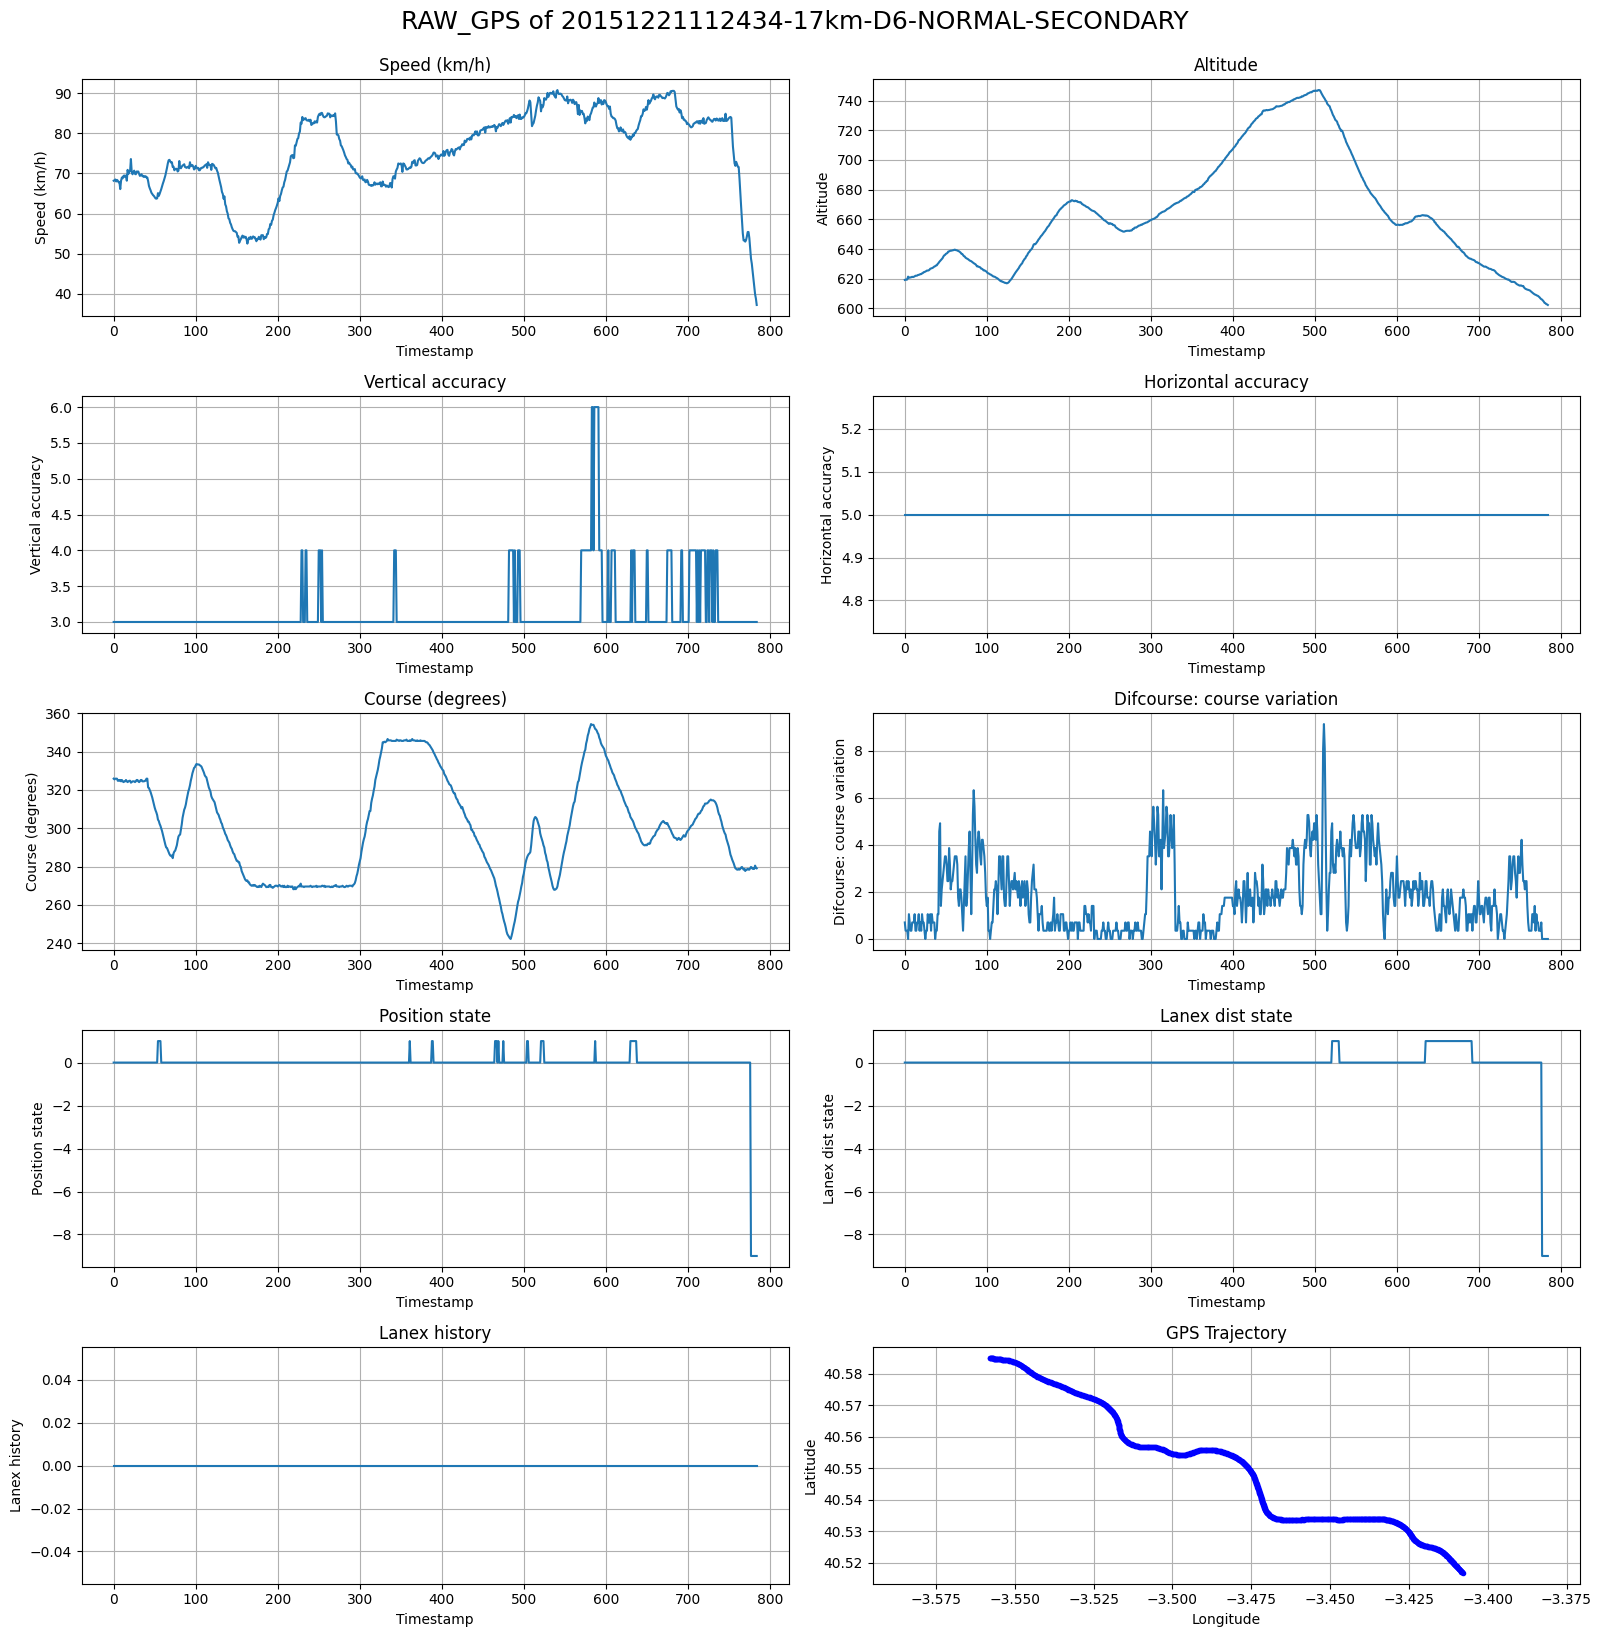

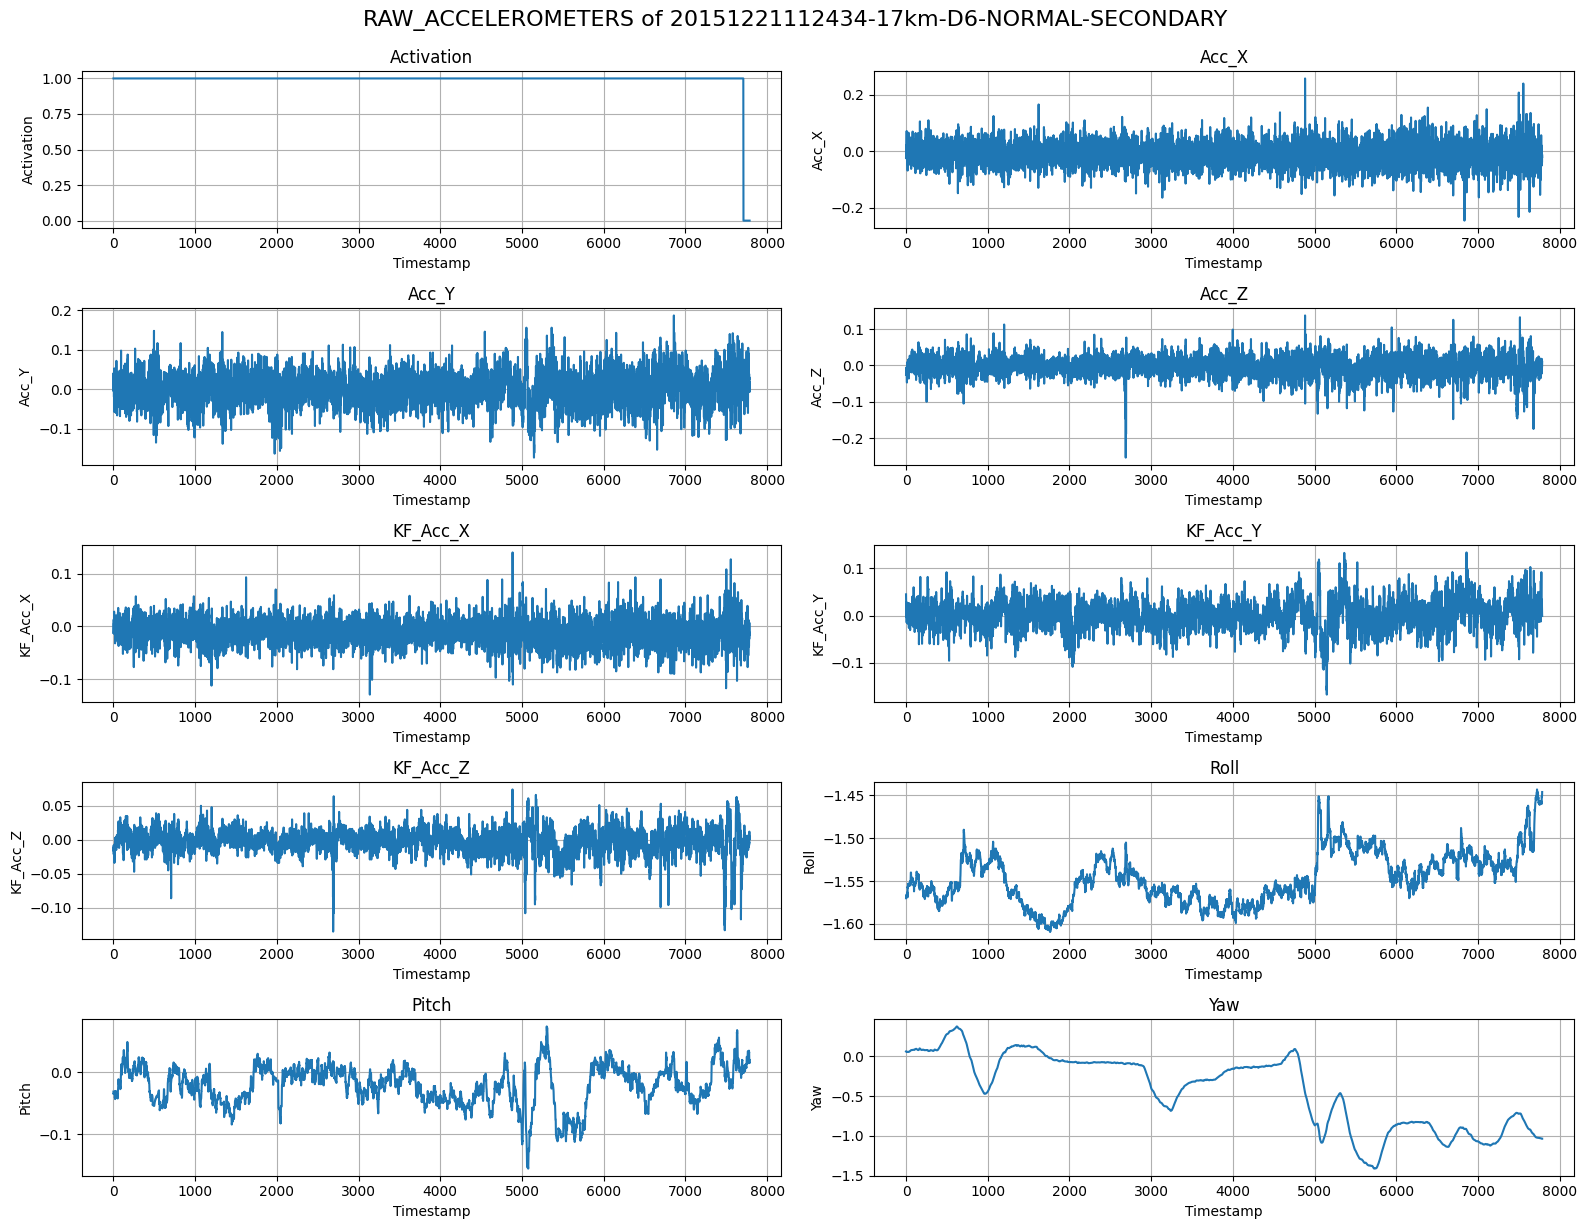

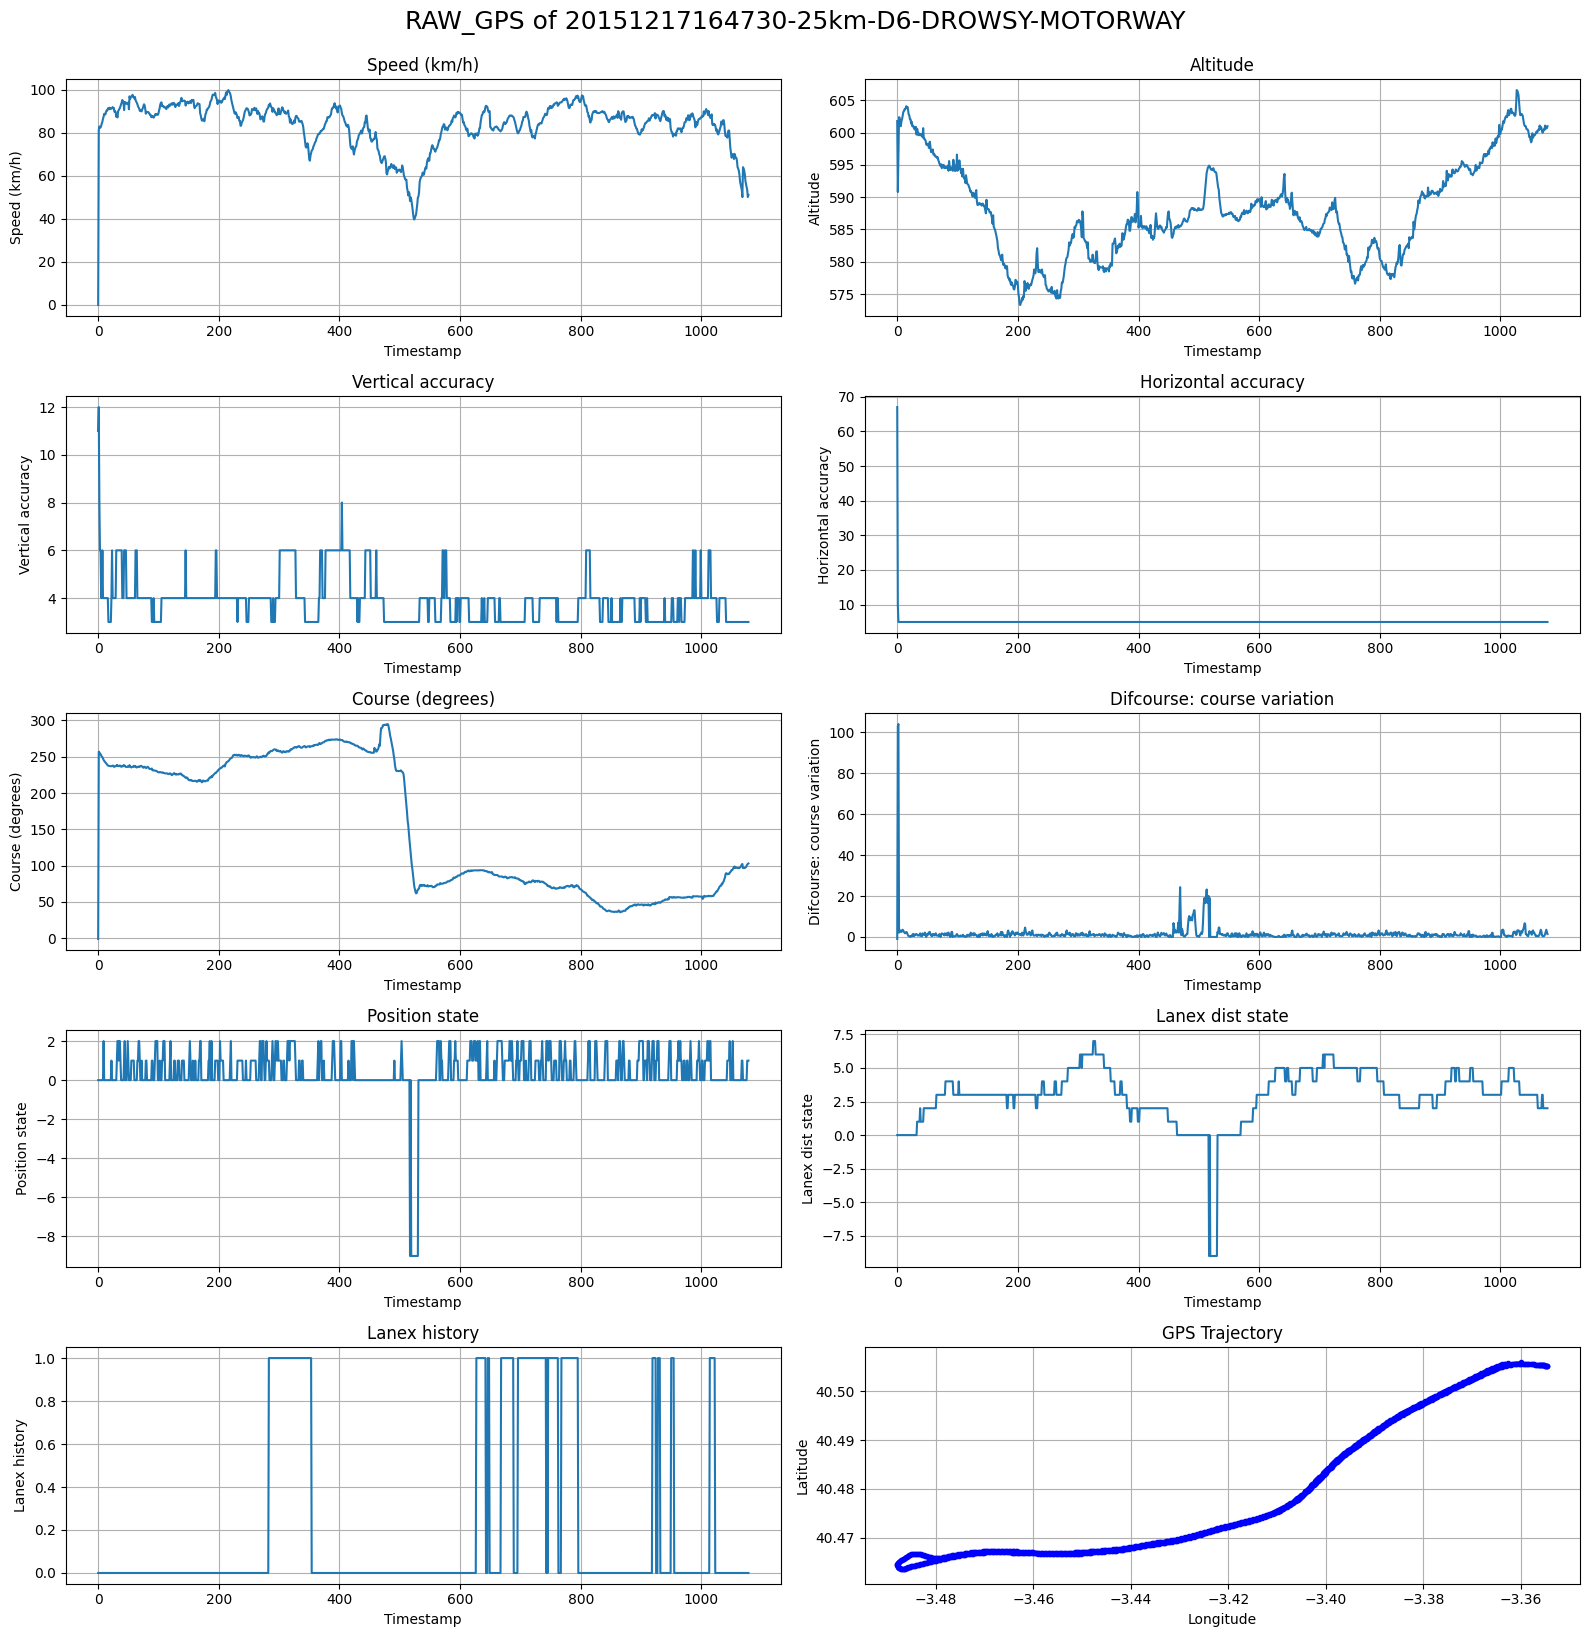

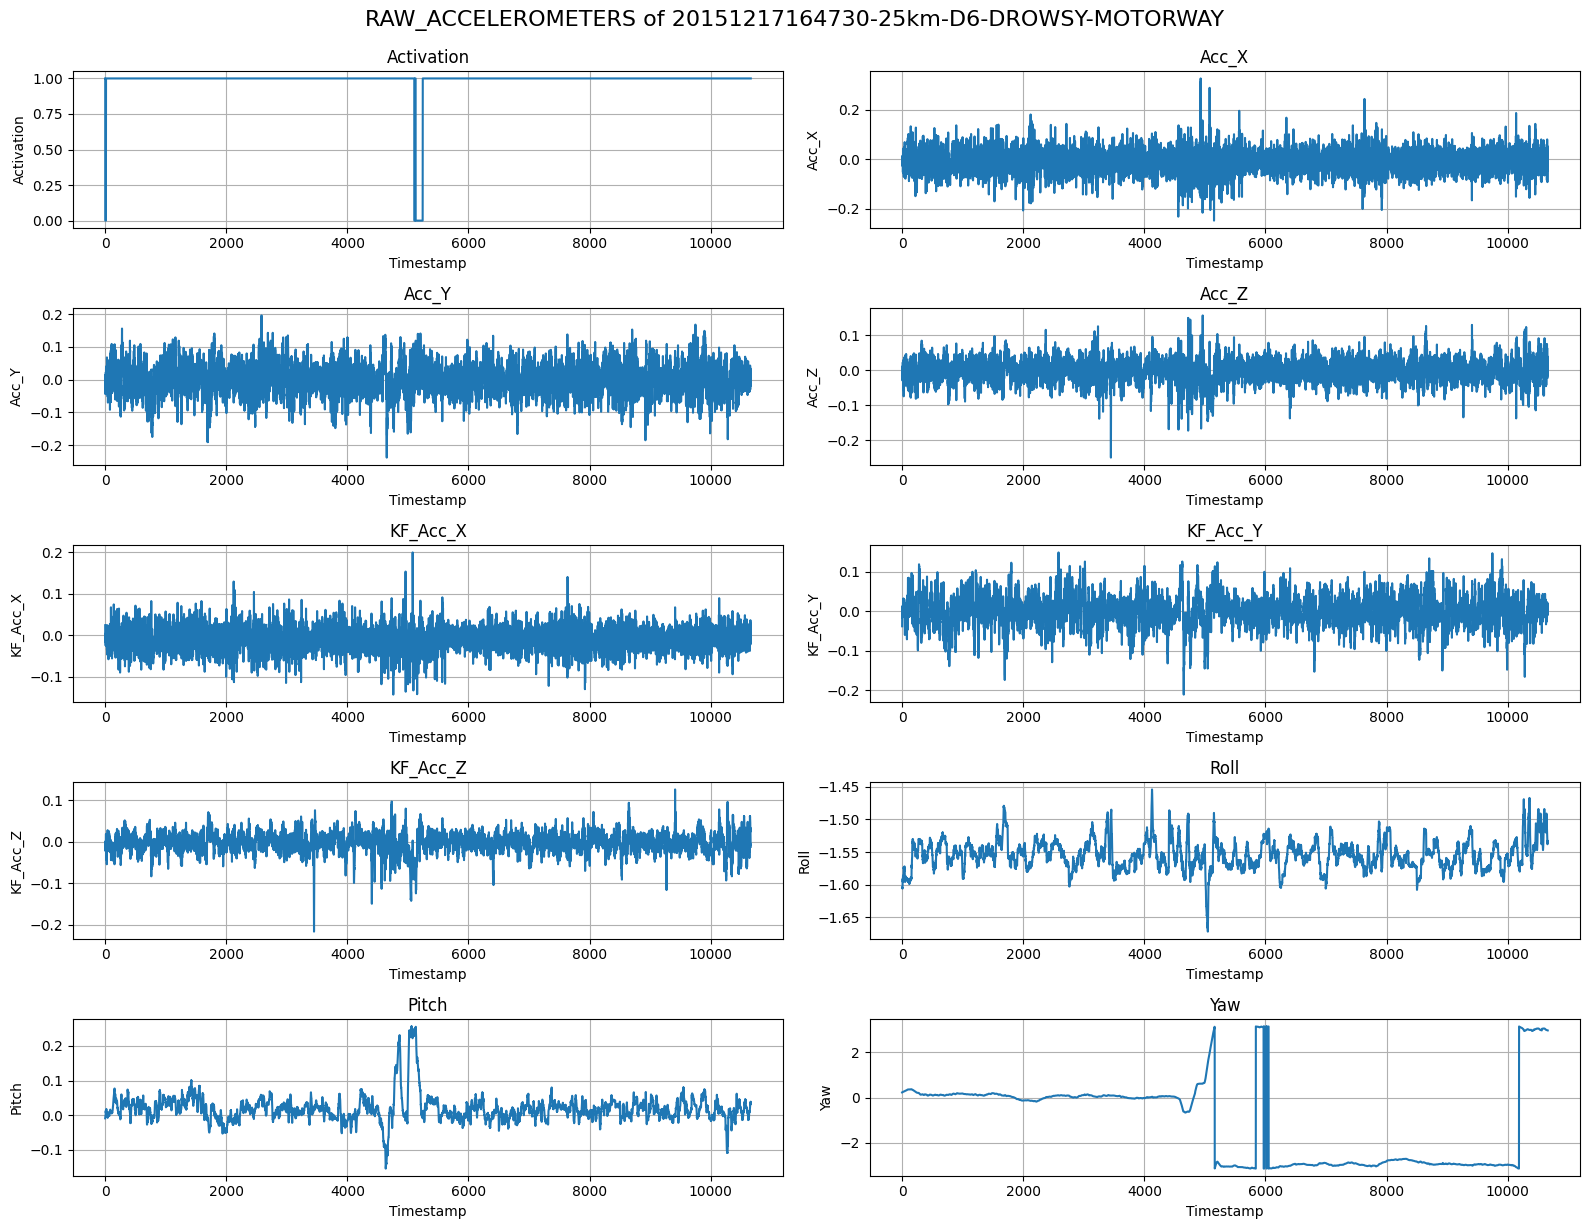

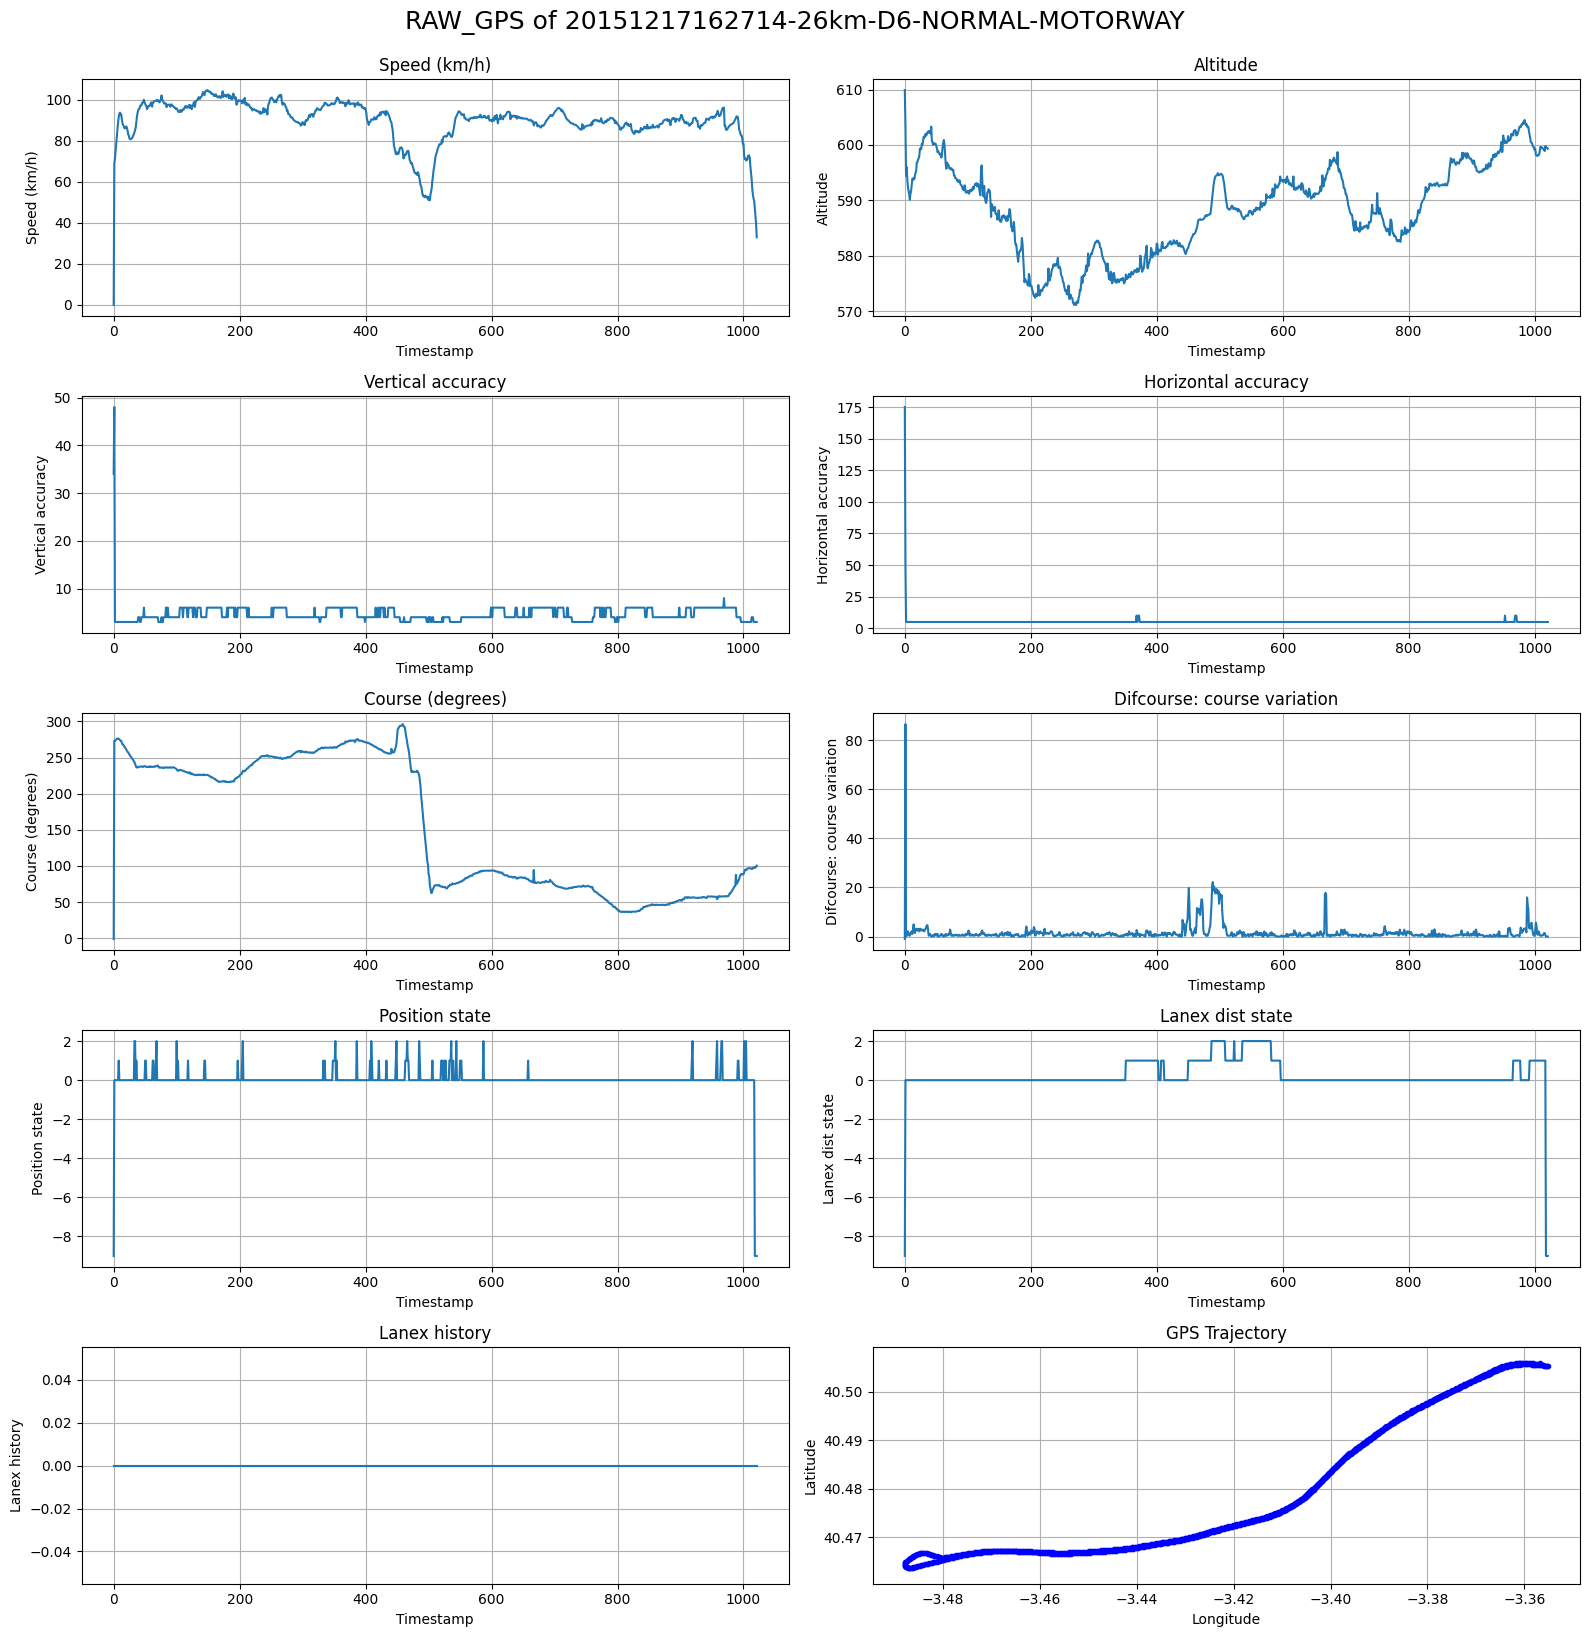

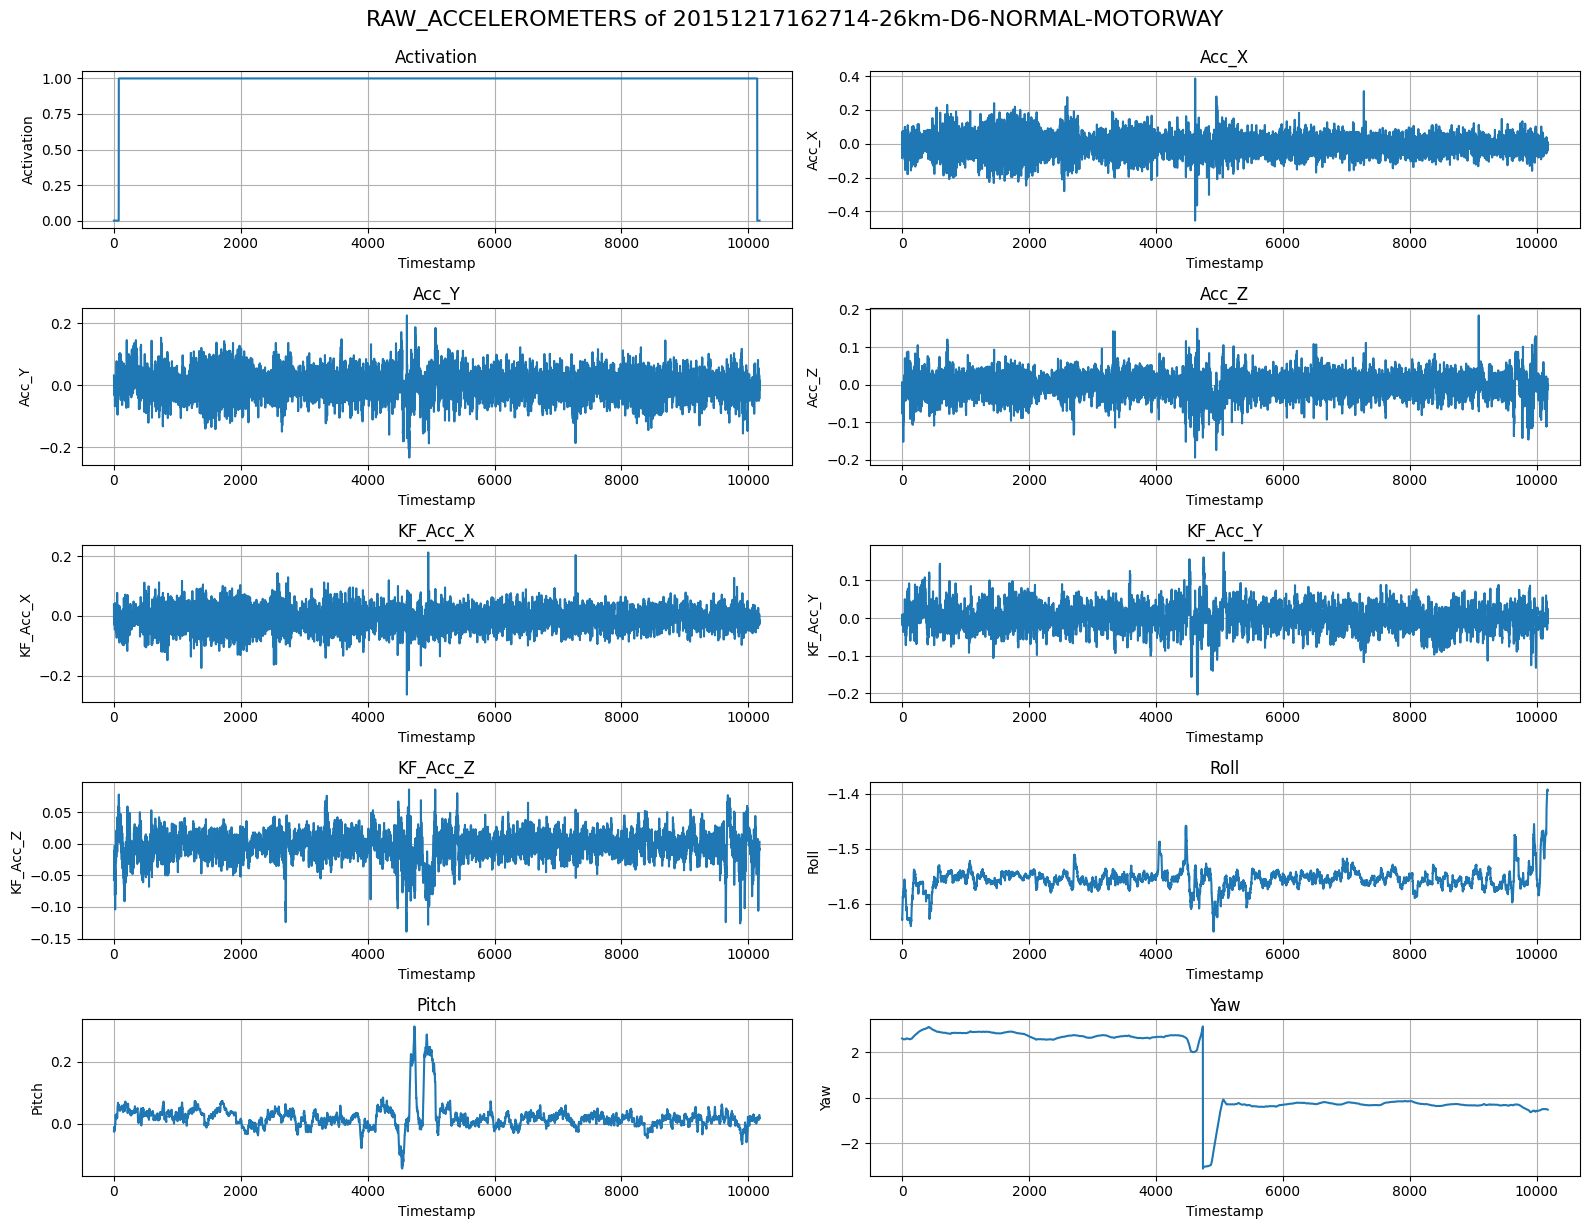

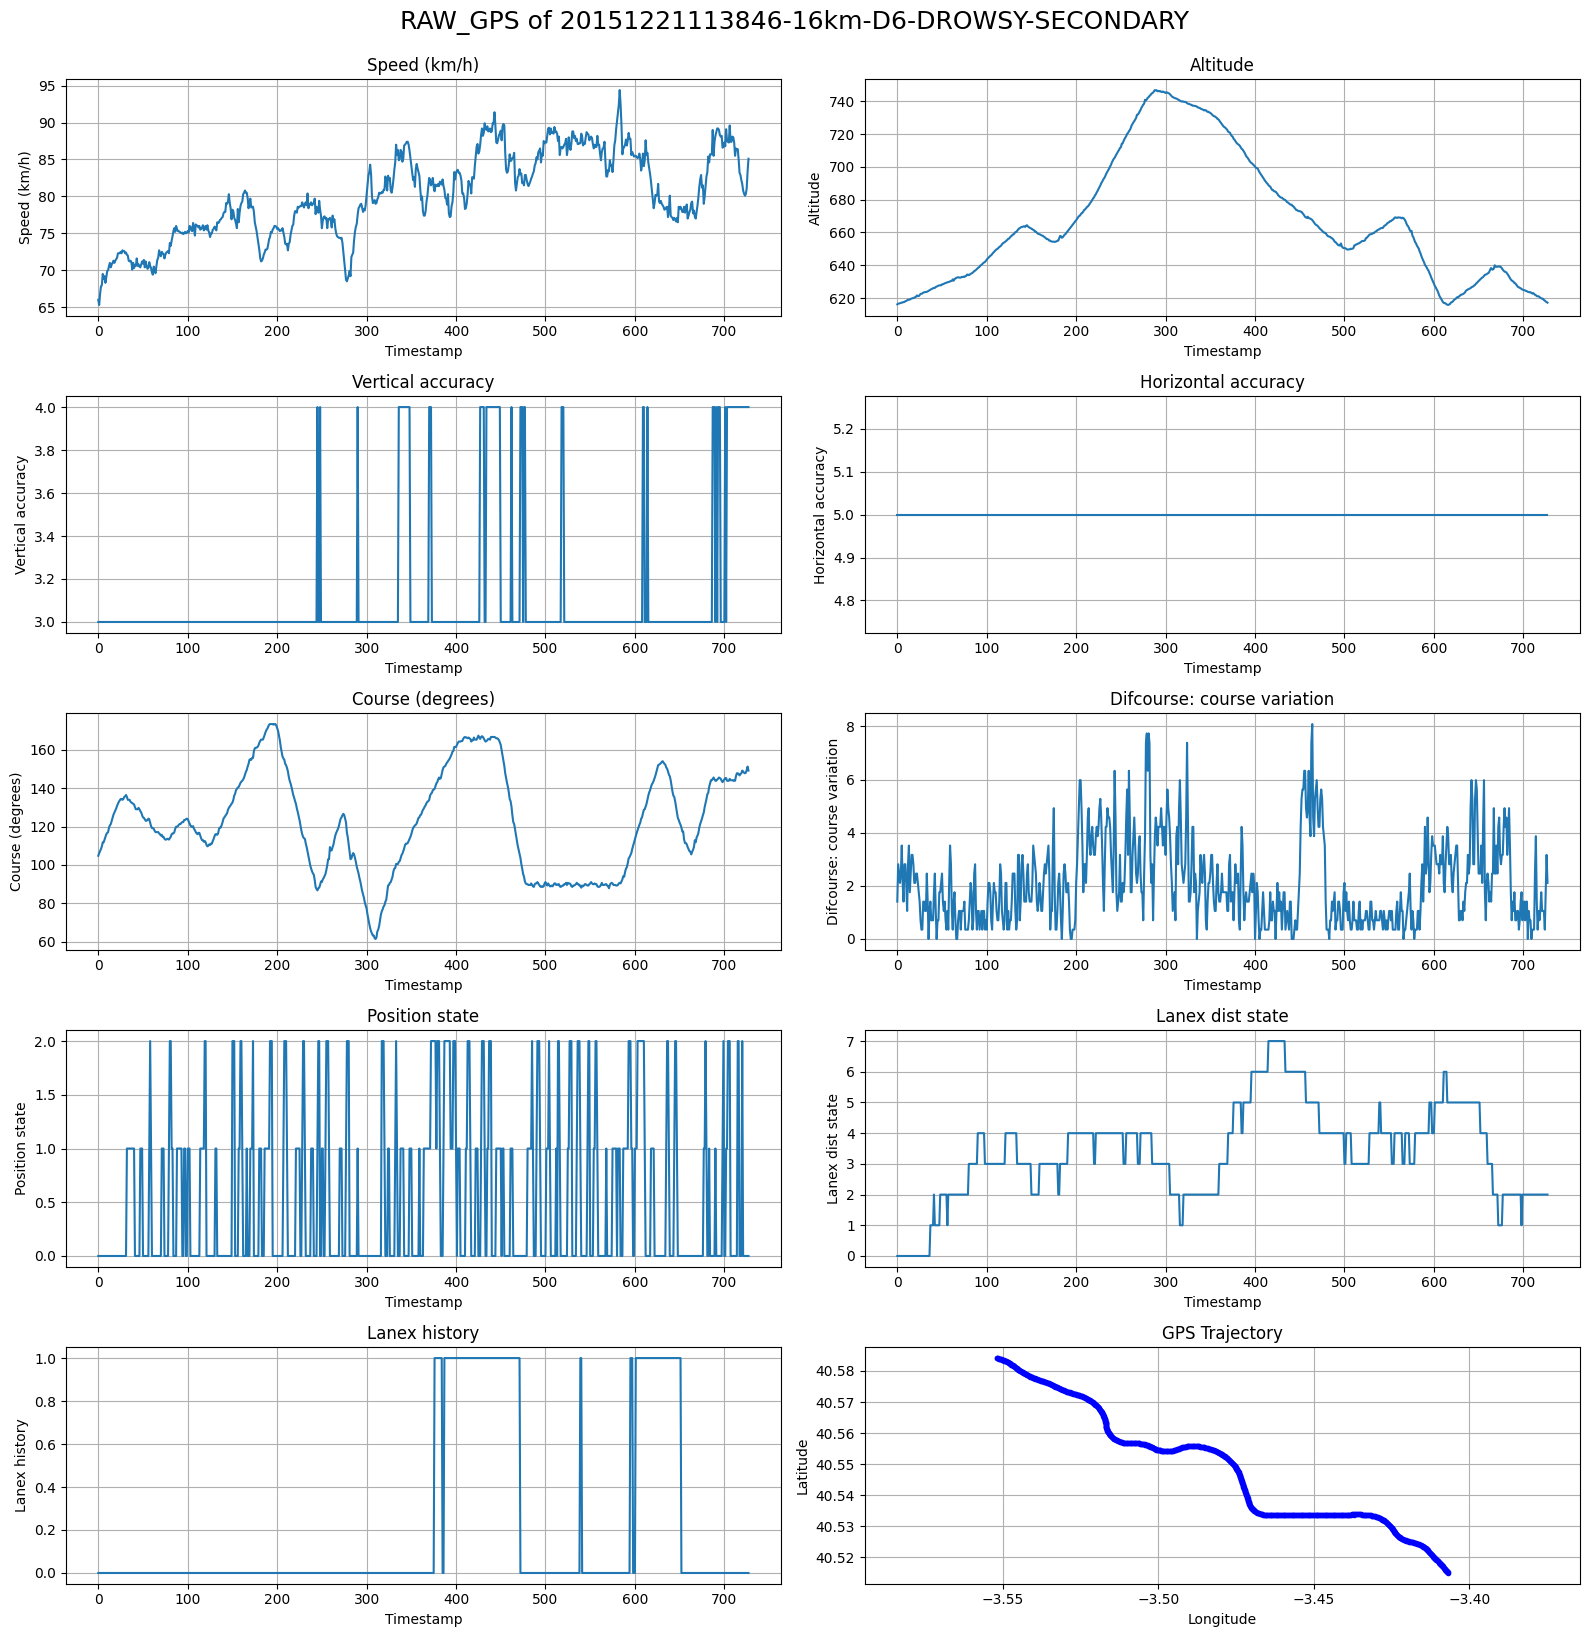

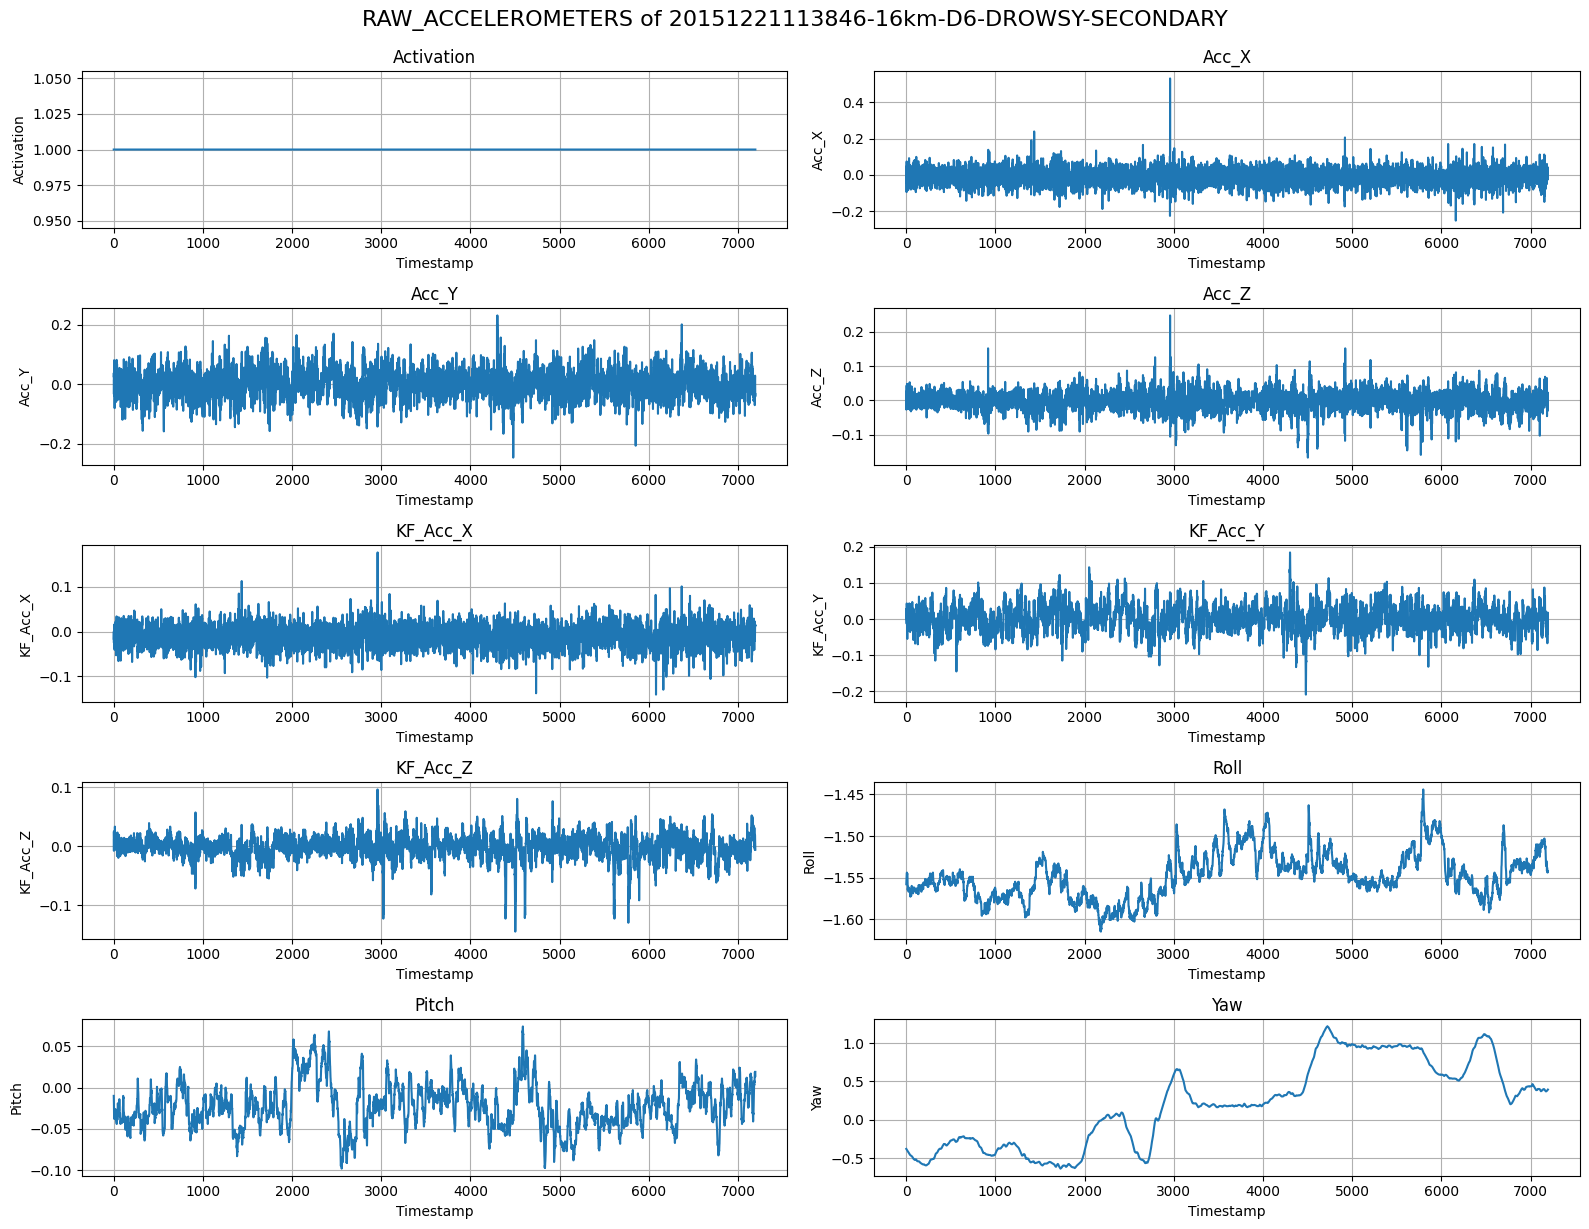

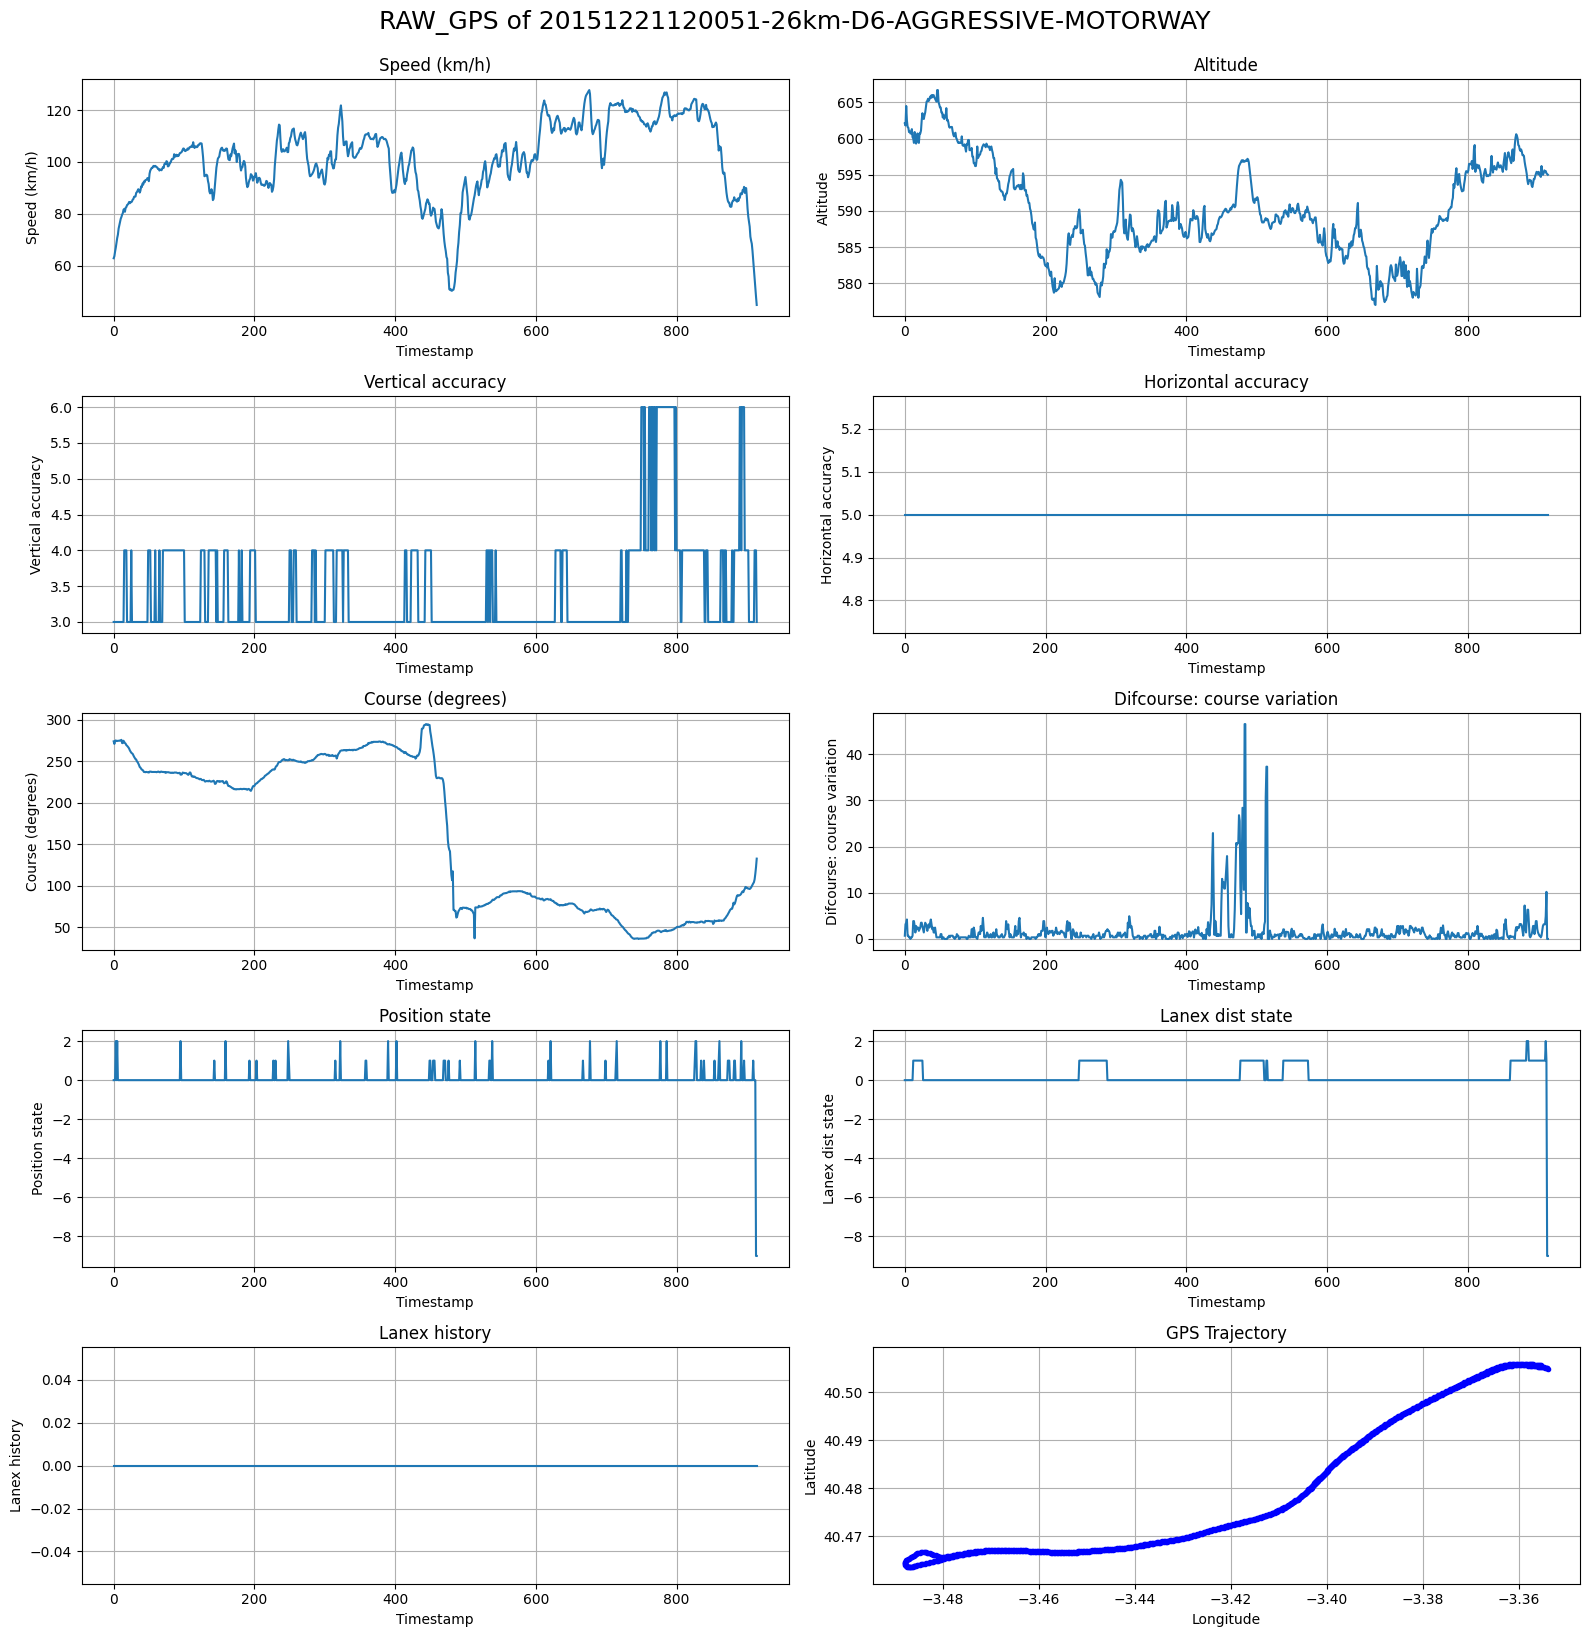

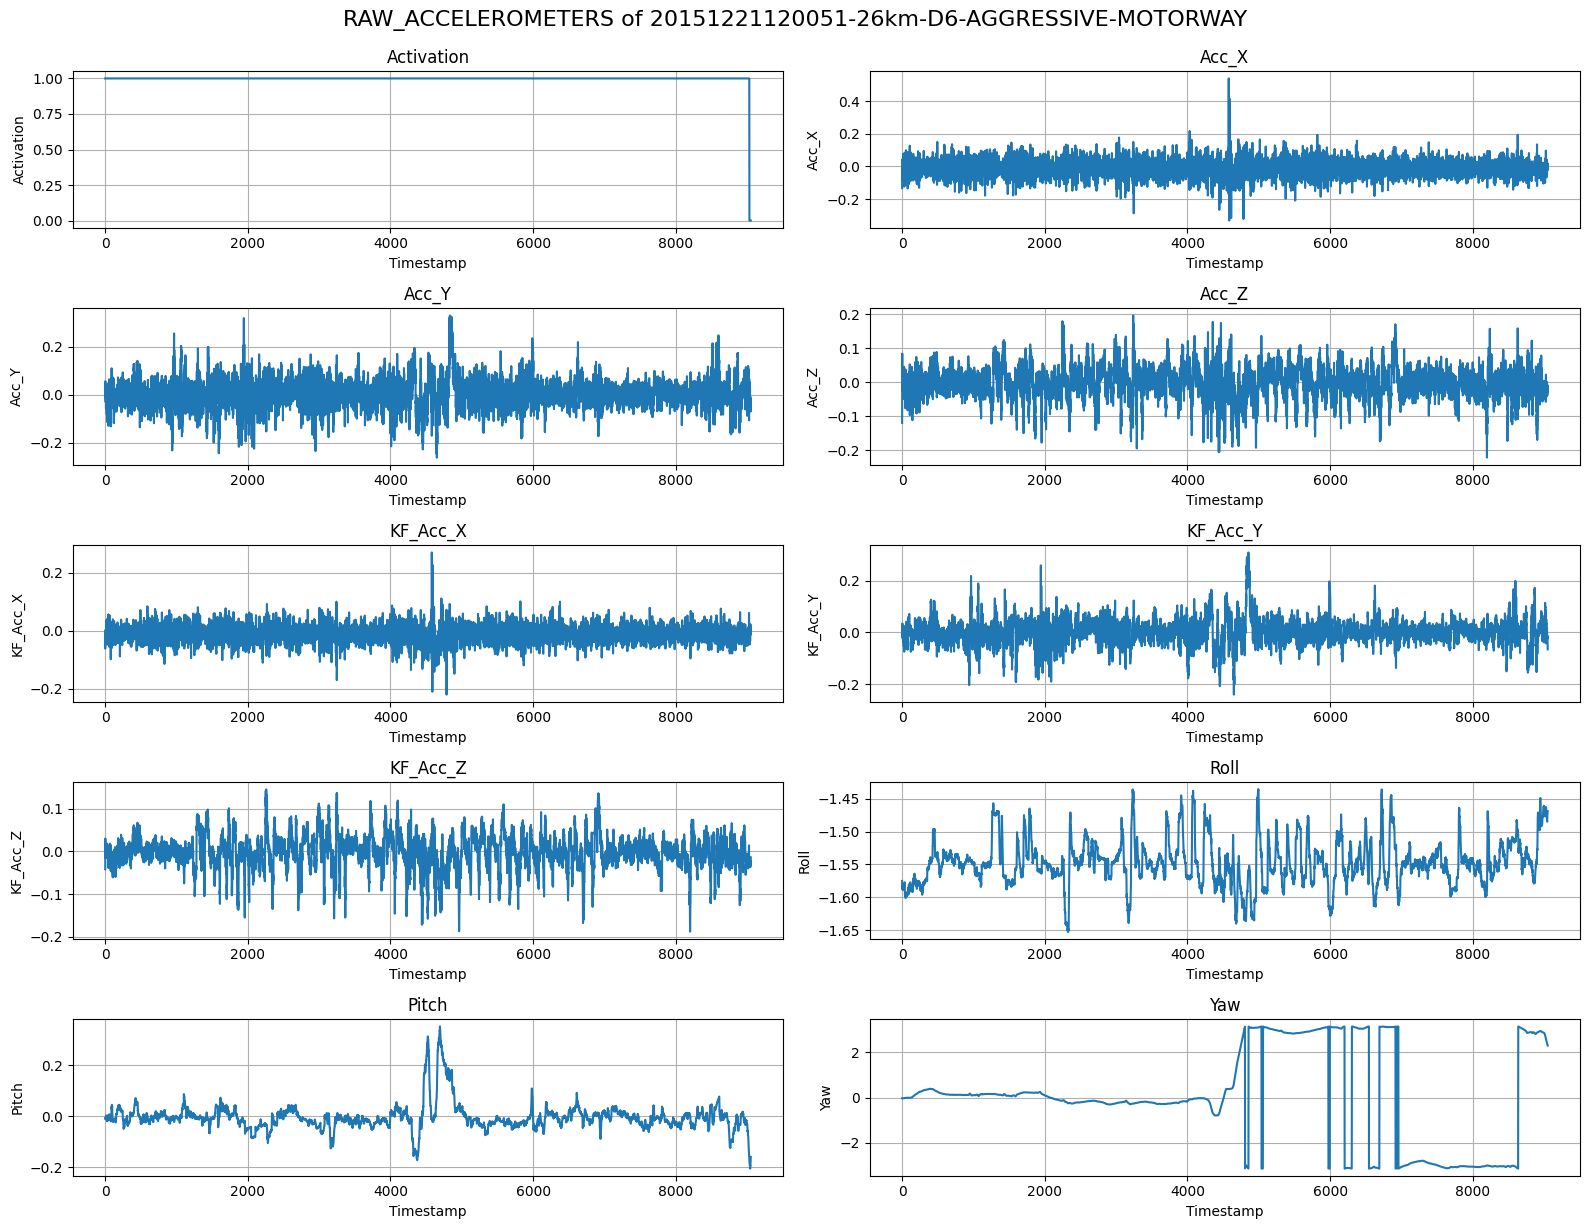

In [57]:
for scenario_path in scenario_folders:
    print(f"\n[시각화 결과 저장 중] {scenario_path}")
    viz_gps(scenario_path)
    viz_accel(scenario_path)